In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from random import choices

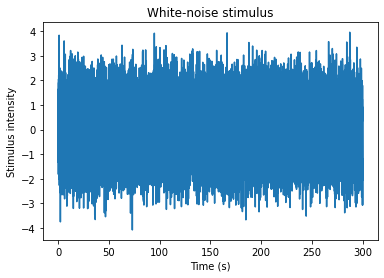

In [2]:
# 1.a

Fs = 128
duration = 5 * 60
t = np.arange(0,duration,1/Fs)

s = np.random.normal(0, 1, size=len(t))

plt.plot(t, s)
plt.xlabel('Time (s)')
plt.ylabel('Stimulus intensity')
plt.title('White-noise stimulus')
plt.show()

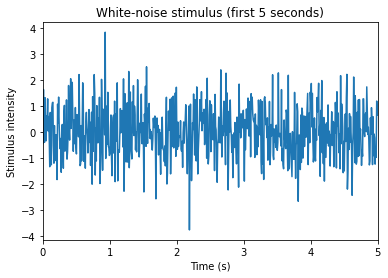

In [3]:
plt.plot(t[:Fs*5], s[:Fs*5])
plt.xlabel('Time (s)')
plt.ylabel('Stimulus intensity')
plt.title('White-noise stimulus (first 5 seconds)')
plt.xlim(0, 5)
plt.show()


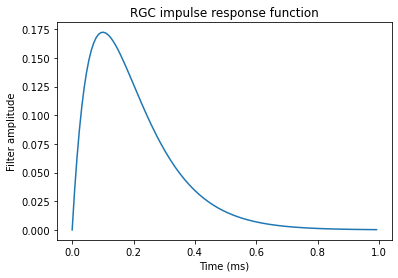

In [4]:
# 1.b

tau = 0.1
R = 6
dt = 1/Fs
t_h = np.arange(0,1,1/Fs)

h = R * dt * t_h/(tau**2) * np.exp(-t_h/tau)
               
plt.plot(t_h, h)
plt.xlabel('Time (ms)')
plt.ylabel('Filter amplitude')
plt.title('RGC impulse response function')
plt.show()


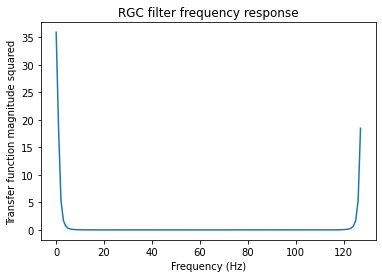

In [5]:
# 1.c
# This is a low-pass filter
# The cutoff frequency decreases as tau increases

H = np.fft.fft(h)
H_sq = np.abs(H)**2


plt.plot(H_sq)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Transfer function magnitude squared')
plt.title('RGC filter frequency response')
plt.show()

(0.0, 7.0)

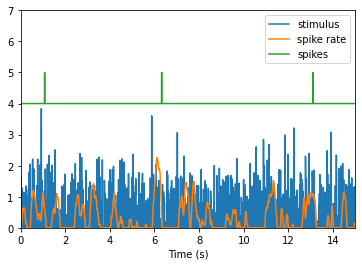

In [6]:
# 1.d

def stim2spikes(s,h):
    rate = np.maximum(np.convolve(s, h, mode='full'),0)
    rate = rate[:len(t)]
    spikes=(np.random.rand(len(s))<(rate*dt))
    return rate, spikes

rate, spikes = stim2spikes(s,h)

plt.plot(t, s, label='stimulus')
plt.plot(t, rate ,label='spike rate')
plt.xlim([0,15])
plt.plot(t,spikes+4, label='spikes')
plt.xlabel('Time (s)')
plt.legend()
plt.ylim([0,7])


In [7]:
# 1.e

spike_count = np.random.poisson(rate)
spikes = np.where(spike_count > 0, 1, 0)
spikes

array([0, 0, 0, ..., 0, 0, 0])

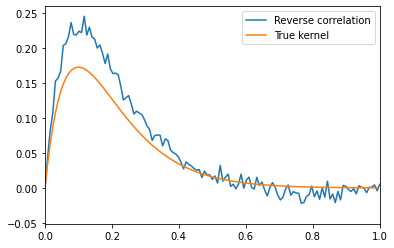

In [8]:
# 1.f

def my_convolve(s,spikes):
    S=np.fft.fft(s)
    Spikes=np.fft.fft(spikes)
    xc = np.fft.ifft(np.conj(S)*Spikes)
    xc = np.real(xc) # Get rid of the imaginary part (which comes from numerical error)
    xc = xc/spikes.sum()
    return xc

h_revcorr = my_convolve(s,spikes)

plt.plot(t,h_revcorr,label='Reverse correlation')
plt.plot(t_h, h, label='True kernel')
plt.xlim([0,1])
plt.legend()

Text(0.5, 0, 'Time (s)')

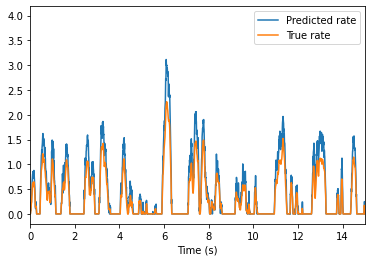

In [9]:
# 1.g

rate_predicted, _ = stim2spikes(s,h_revcorr[t<1])

plt.plot(t,rate_predicted,label='Predicted rate')
plt.plot(t,rate,label='True rate')
plt.xlim([0,15])
plt.legend()
plt.xlabel('Time (s)')

In [10]:
# 2.a

spikes_random = np.random.permutation(spikes)
rc_random = my_convolve(s, spikes_random)

In [11]:
# 2.b

h_random = rc_random
for i in range(0, 999):
    spikes_random_i = np.random.permutation(spikes)
    rc_random_i = my_convolve(s, spikes_random_i)
    h_random = np.vstack([h_random, rc_random_i])

h_random = np.transpose(h_random)
np.shape(h_random)

(38400, 1000)

In [12]:
# 2.c

p = np.zeros(h_random.shape[0])
for i in range(0, h_random.shape[0]):
    p_i = (sum(h_random[i,] > h_revcorr[i]) + 1)/1000
    p[i] = p_i

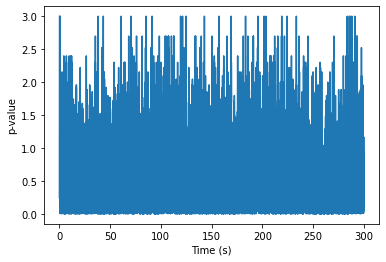

In [13]:
plt.plot(t, -np.log10(p))
plt.xlabel('Time (s)')
plt.ylabel('p-value')
plt.show()

In [14]:
# 2.d
# I would expect around 122 to pass this threshold
# Code below shows how many actually passed the threshold

sum(p[:128] < 0.05)

65

In [15]:
# 2.e
# We would have to perform N shuffles to be likely to obtain such result

N = Fs * duration
print(N)
alpha_bonf = 0.05/N
print(alpha_bonf)

38400
1.3020833333333335e-06
